In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

file_path = 'dados_sem_nulos.csv'
df = pd.read_csv(file_path)

print("Dados carregados com sucesso!")
print(f"O dataset tem {df.shape[0]} linhas e {df.shape[1]} colunas.\n")

numerical_cols = [
    'C008',
    'consumo_semanal_frutas',
    'consumo_semanal_verdura_legume',
    'minutos_atv_fis_semana',
    'IMC'
]

categorical_cols = [col for col in df.columns if col not in numerical_cols]

print("Gerando boxplots para colunas numéricas...")

output_dir_num = 'boxplots_numericos'
if not os.path.exists(output_dir_num):
    os.makedirs(output_dir_num)

for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot para {col}', fontsize=15)
    plt.xlabel(col, fontsize=12)

    plt.savefig(os.path.join(output_dir_num, f'boxplot_{col}.png'))
    plt.close()

print(f"Boxplots salvos na pasta: '{output_dir_num}'")

print("\n--- Análise de Frequência para Colunas Categóricas ---")

for col in categorical_cols:
    print(f"\nContagem de valores para a coluna: '{col}'")

    freq_percent = df[col].value_counts(normalize=True) * 100

    freq_abs = df[col].value_counts()

    freq_df = pd.DataFrame({
        'Contagem': freq_abs,
        'Porcentagem (%)': freq_percent.round(2)
    })
    
    print(freq_df)

print("\n--- Análise de Outliers Concluída ---")

Dados carregados com sucesso!
O dataset tem 88736 linhas e 30 colunas.

Gerando boxplots para colunas numéricas...
Boxplots salvos na pasta: 'boxplots_numericos'

--- Análise de Frequência para Colunas Categóricas ---

Contagem de valores para a coluna: 'P01101'
        Contagem  Porcentagem (%)
P01101                           
3          20027            22.57
2          17542            19.77
7          12241            13.79
4          10716            12.08
1           9345            10.53
5           8481             9.56
0           7348             8.28
6           3036             3.42

Contagem de valores para a coluna: 'P013'
      Contagem  Porcentagem (%)
P013                           
2        23610            26.61
3        21975            24.76
1        10628            11.98
4        10277            11.58
5         7424             8.37
0         6580             7.42
7         5588             6.30
6         2654             2.99

Contagem de valores para a coluna

Gerando gráfico 'Antes e Depois' da transformação log...
Gráfico 'comparacao_transformacao_log.png' salvo!

--- Demonstração: Alternativa de Discretização do IMC ---
Contagem de pacientes por Categoria de IMC (Método Recomendado):
IMC_Categoria
Abaixo do Peso         2247
Peso Normal           34386
Sobrepeso             33555
Obesidade Grau I      13635
Obesidade Grau II      3743
Obesidade Grau III     1170
Name: count, dtype: int64


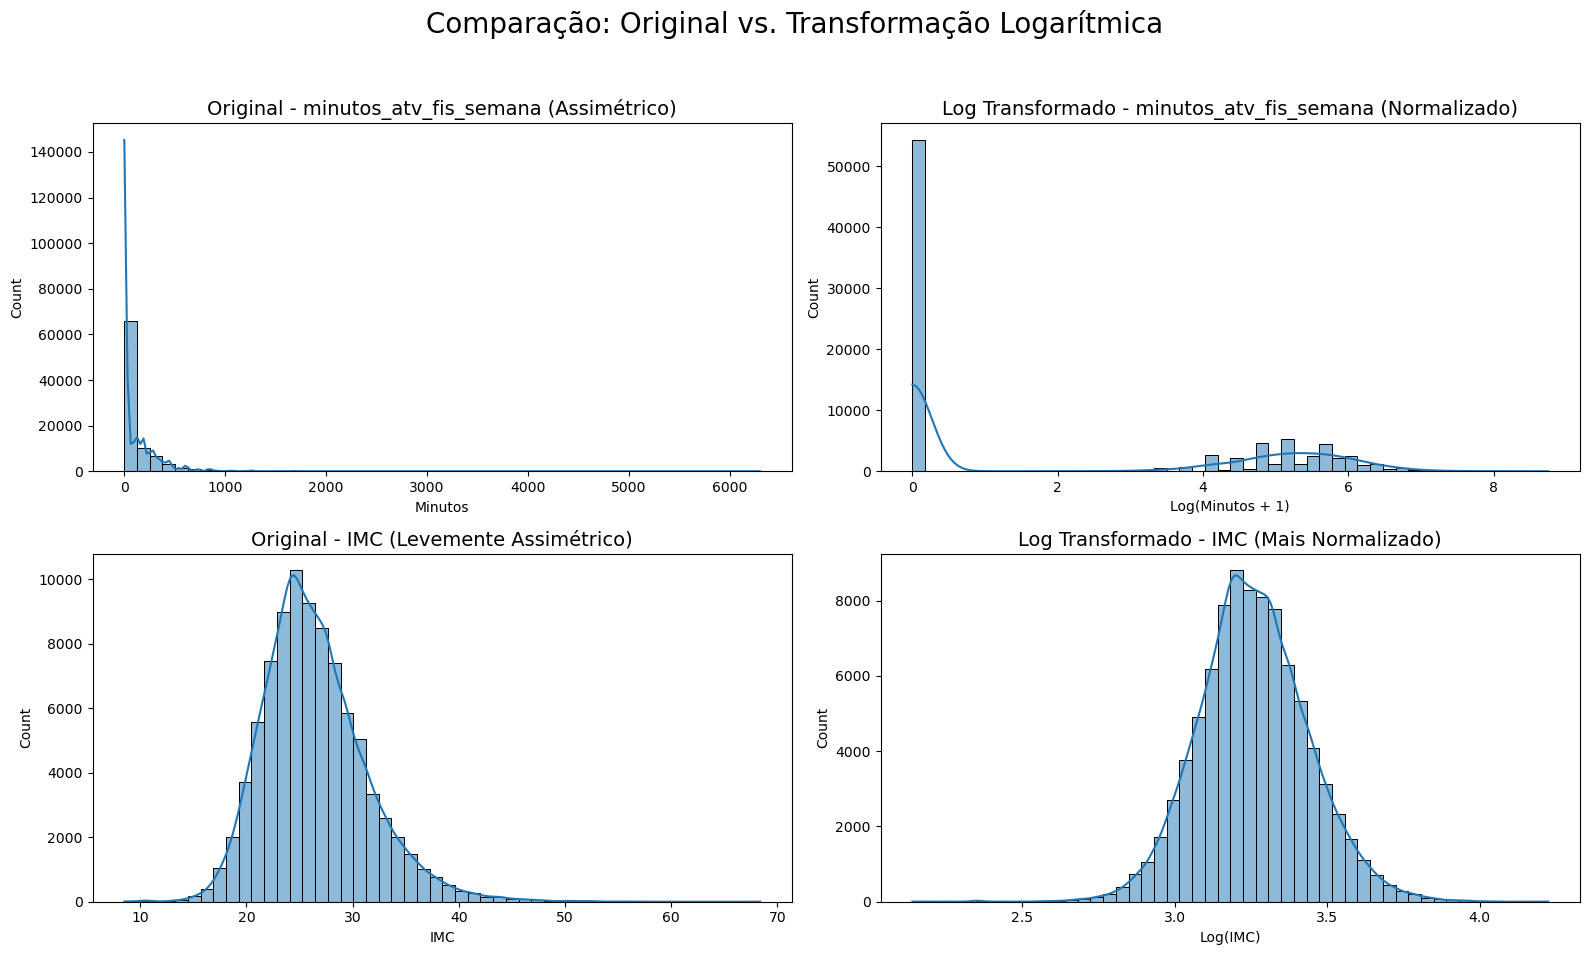

In [4]:
df['minutos_atv_fis_semana_log'] = np.log1p(df['minutos_atv_fis_semana'])

# Para IMC (não deve ter 0, então log(x) normal é seguro)
# Vamos adicionar uma pequena constante (1e-6) por segurança, caso haja algum 0
df['IMC_log'] = np.log(df['IMC'] + 1e-6) 

print("Gerando gráfico 'Antes e Depois' da transformação log...")

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Comparação: Original vs. Transformação Logarítmica', fontsize=20)

# Gráfico 1: minutos_atv_fis_semana (Original)
sns.histplot(df['minutos_atv_fis_semana'], kde=True, ax=axes[0, 0], bins=50)
axes[0, 0].set_title('Original - minutos_atv_fis_semana (Assimétrico)', fontsize=14)
axes[0, 0].set_xlabel('Minutos')

# Gráfico 2: minutos_atv_fis_semana (Log Transformado)
sns.histplot(df['minutos_atv_fis_semana_log'], kde=True, ax=axes[0, 1], bins=50)
axes[0, 1].set_title('Log Transformado - minutos_atv_fis_semana (Normalizado)', fontsize=14)
axes[0, 1].set_xlabel('Log(Minutos + 1)')

# Gráfico 3: IMC (Original)
sns.histplot(df['IMC'], kde=True, ax=axes[1, 0], bins=50)
axes[1, 0].set_title('Original - IMC (Levemente Assimétrico)', fontsize=14)
axes[1, 0].set_xlabel('IMC')

# Gráfico 4: IMC (Log Transformado)
sns.histplot(df['IMC_log'], kde=True, ax=axes[1, 1], bins=50)
axes[1, 1].set_title('Log Transformado - IMC (Mais Normalizado)', fontsize=14)
axes[1, 1].set_xlabel('Log(IMC)')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('comparacao_transformacao_log.png')
print("Gráfico 'comparacao_transformacao_log.png' salvo!")


# --- 4. (Alternativa Recomendada) Discretização do IMC ---
print("\n--- Demonstração: Alternativa de Discretização do IMC ---")

# 1. Definir os 'cortes' (bins) da OMS
bins_imc = [
    0, 18.5, 24.9, 29.9, 34.9, 39.9, np.inf
]
# 2. Definir os 'rótulos' (labels)
labels_imc = [
    'Abaixo do Peso', 'Peso Normal', 'Sobrepeso', 
    'Obesidade Grau I', 'Obesidade Grau II', 'Obesidade Grau III'
]

# 3. Criar a nova coluna categórica
df['IMC_Categoria'] = pd.cut(df['IMC'], bins=bins_imc, labels=labels_imc, right=False)

# 4. Verificar o resultado
print("Contagem de pacientes por Categoria de IMC (Método Recomendado):")
print(df['IMC_Categoria'].value_counts().sort_index())